In [1]:
import ROOT

MVA_DM_gen = ROOT.TH1D("MVA_DM_gen","", 12, 0, 12)
HPS_DM_gen = ROOT.TH1D("HPS_DM_gen","", 12, 0, 12)
MVA_DM = ROOT.TH1D("MVA_DM","", 12, 0, 12)
HPS_DM = ROOT.TH1D("HPS_DM","", 12, 0, 12)
tauFlag = ROOT.TH1D("TauFlag","", 12, 0, 12)

f1 = ROOT.TFile.Open("../Merged_ggH_VBF_HToTauTau_M-125_mt_2018.root","READ")
t1 = f1.Get("ntuple")

MVA_DM_gen.SetBinContent(1, t1.GetEntries("mva_dm_2==0 &&tauFlag_2==0 &&gen_match_2==5"))
MVA_DM_gen.SetBinContent(2, t1.GetEntries("mva_dm_2==1 &&tauFlag_2==1 &&gen_match_2==5"))
MVA_DM_gen.SetBinContent(3, t1.GetEntries("mva_dm_2==2 &&tauFlag_2==2 &&gen_match_2==5"))
MVA_DM_gen.SetBinContent(11,t1.GetEntries("mva_dm_2==10&&tauFlag_2==10&&gen_match_2==5"))
MVA_DM_gen.SetBinContent(12,t1.GetEntries("mva_dm_2==11&&tauFlag_2==11&&gen_match_2==5"))

HPS_DM_gen.SetBinContent(1, t1.GetEntries("tau_decay_mode_2==0 &&tauFlag_2==0 &&gen_match_2==5"))
HPS_DM_gen.SetBinContent(2, t1.GetEntries("tau_decay_mode_2==1 &&tauFlag_2==1 &&gen_match_2==5"))
HPS_DM_gen.SetBinContent(3, t1.GetEntries("tau_decay_mode_2==2 &&tauFlag_2==2 &&gen_match_2==5"))
HPS_DM_gen.SetBinContent(11,t1.GetEntries("tau_decay_mode_2==10&&tauFlag_2==10&&gen_match_2==5"))
HPS_DM_gen.SetBinContent(12,t1.GetEntries("tau_decay_mode_2==11&&tauFlag_2==11&&gen_match_2==5"))


MVA_DM.SetBinContent(1, t1.GetEntries("mva_dm_2==0 &&gen_match_2==5"))
MVA_DM.SetBinContent(2, t1.GetEntries("mva_dm_2==1 &&gen_match_2==5"))
MVA_DM.SetBinContent(3, t1.GetEntries("mva_dm_2==2 &&gen_match_2==5"))
MVA_DM.SetBinContent(11,t1.GetEntries("mva_dm_2==10&&gen_match_2==5"))
MVA_DM.SetBinContent(12,t1.GetEntries("mva_dm_2==11&&gen_match_2==5"))

HPS_DM.SetBinContent(1, t1.GetEntries("tau_decay_mode_2==0 &&gen_match_2==5"))
HPS_DM.SetBinContent(2, t1.GetEntries("tau_decay_mode_2==1 &&gen_match_2==5"))
HPS_DM.SetBinContent(3, t1.GetEntries("tau_decay_mode_2==2 &&gen_match_2==5"))
HPS_DM.SetBinContent(11,t1.GetEntries("tau_decay_mode_2==10&&gen_match_2==5"))
HPS_DM.SetBinContent(12,t1.GetEntries("tau_decay_mode_2==11&&gen_match_2==5"))


tauFlag.SetBinContent(1, t1.GetEntries("tauFlag_2==0 &&gen_match_2==5"))
tauFlag.SetBinContent(2, t1.GetEntries("tauFlag_2==1 &&gen_match_2==5"))
tauFlag.SetBinContent(3, t1.GetEntries("tauFlag_2==2 &&gen_match_2==5"))
tauFlag.SetBinContent(11,t1.GetEntries("tauFlag_2==10&&gen_match_2==5"))
tauFlag.SetBinContent(12,t1.GetEntries("tauFlag_2==11&&gen_match_2==5"))



MVA_DM_eff = ROOT.TGraphAsymmErrors()
MVA_DM_eff.Divide(MVA_DM_gen,tauFlag)
MVA_DM_eff.Print()

HPS_DM_eff = ROOT.TGraphAsymmErrors()
HPS_DM_eff.Divide(HPS_DM_gen,tauFlag)
HPS_DM_eff.Print()


MVA_DM_purity = ROOT.TGraphAsymmErrors()
MVA_DM_purity.Divide(MVA_DM_gen,MVA_DM)
MVA_DM_purity.Print()

HPS_DM_purity = ROOT.TGraphAsymmErrors()
HPS_DM_purity.Divide(HPS_DM_gen,HPS_DM)
HPS_DM_purity.Print()

Welcome to JupyROOT 6.20/06


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def custom_cms_label(ax, label1, label2, lumi=35.9, energy=13, extra_label=''):
    plt.rcParams.update({'font.size': 24})
    ax.text(
        0, 1, r'$\mathbf{CMS}\ \mathit{'+label1+'}\ \mathit{'+label2+'}$',
        ha='left', va='bottom', transform=ax.transAxes,
    )
    ax.text(
        1, 1, r'2018 ({:.0f} TeV)'.format(energy),
        ha='right', va='bottom', transform=ax.transAxes,
    )
    # label on centre top of axes
    ax.text(
        0.5, 1, extra_label,
        ha='center', va='bottom', transform=ax.transAxes,
    )
    plt.rcParams.update({'font.size': 18})

def plot_chart(MVA_DM, HPS_DM, y_label):
    
    labels = ['DM 0', 'DM 1', 'DM 2', 'DM 10', 'DM 11']
    labels = ["$\pi^\pm$","$\pi^\pm \pi^0$","$\pi^\pm 2\pi^0$","$3\pi^\pm$","$3\pi^\pm \pi^0$"]
    
    SMALL_SIZE = 19
    MEDIUM_SIZE = 22
    BIGGER_SIZE = 29
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(10,8))
    rects1 = ax.bar(x - width/2, MVA_DM, width, label='MVA')
    rects2 = ax.bar(x + width/2, HPS_DM, width, label='HPS')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    #ax.set_title('Scores by group and gender')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc=9)
    ax.set_ylim(0,1)
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    custom_cms_label(ax, 'Simulation', 'Preliminary' , lumi=59.7, energy=13, extra_label='')
    
    autolabel(rects1)
    autolabel(rects2)
    
    fig.tight_layout()
    

    
    plt.show()

x[0]=0.5, y[0]=0.828928, exl[0]=0.5, exh[0]=0.5, eyl[0]=0.00127806, eyh[0]=0.00127056
x[1]=1.5, y[1]=0.793989, exl[1]=0.5, exh[1]=0.5, eyl[1]=0.000898579, eyh[1]=0.000895694
x[2]=2.5, y[2]=0.386791, exl[2]=0.5, exh[2]=0.5, eyl[2]=0.00169631, eyh[2]=0.00169905
x[3]=10.5, y[3]=0.866378, exl[3]=0.5, exh[3]=0.5, eyl[3]=0.0011751, eyh[3]=0.00116647
x[4]=11.5, y[4]=0.652496, exl[4]=0.5, exh[4]=0.5, eyl[4]=0.00230011, eyh[4]=0.00229305
x[0]=0.5, y[0]=0.901792, exl[0]=0.5, exh[0]=0.5, eyl[0]=0.00101284, eyh[0]=0.00100366
x[1]=1.5, y[1]=0.739472, exl[1]=0.5, exh[1]=0.5, eyl[1]=0.000974595, eyh[1]=0.000972245
x[2]=2.5, y[2]=0, exl[2]=0.5, exh[2]=0.5, eyl[2]=0, eyh[2]=2.22123e-05
x[3]=10.5, y[3]=0.880128, exl[3]=0.5, exh[3]=0.5, eyl[3]=0.00112242, eyh[3]=0.00111346
x[4]=11.5, y[4]=0.534405, exl[4]=0.5, exh[4]=0.5, eyl[4]=0.00240601, eyh[4]=0.00240442
x[0]=0.5, y[0]=0.697194, exl[0]=0.5, exh[0]=0.5, eyl[0]=0.00142626, eyh[0]=0.00142248
x[1]=1.5, y[1]=0.677422, exl[1]=0.5, exh[1]=0.5, eyl[1]=0.0009

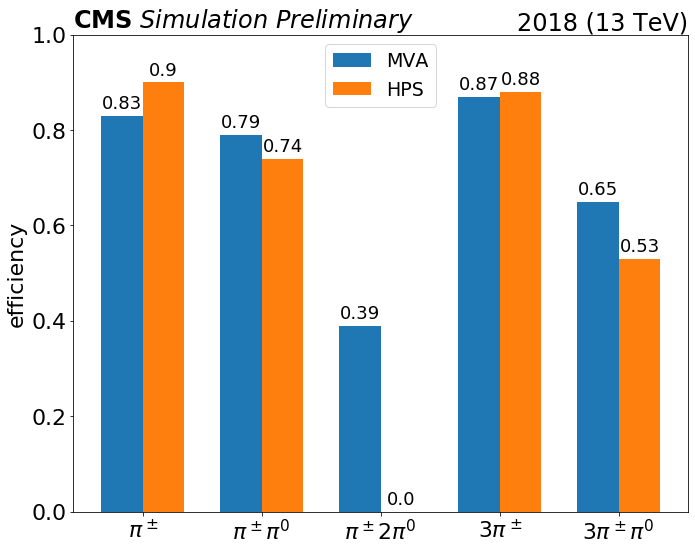

In [3]:
MVA_DM_point_eff = []
HPS_DM_point_eff = []
for i in range(5):
    MVA_DM_point_eff.append(round(MVA_DM_eff.GetPointY(i),2))
    HPS_DM_point_eff.append(round(HPS_DM_eff.GetPointY(i),2))
plot_chart(MVA_DM_point_eff, HPS_DM_point_eff, y_label='efficiency') 

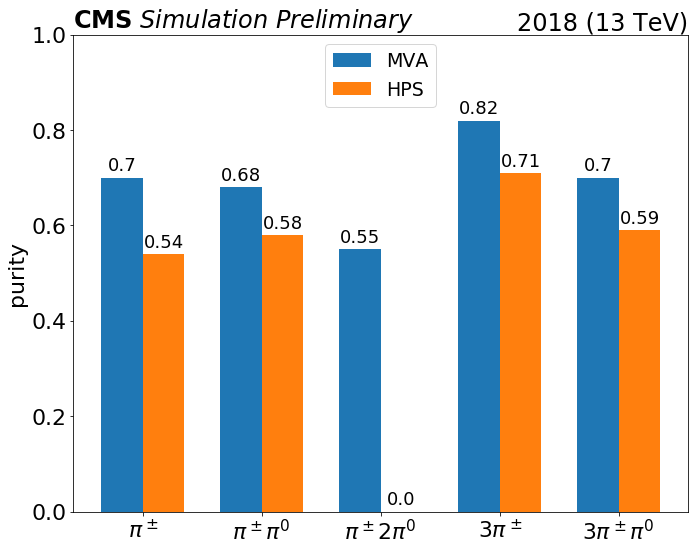

In [4]:
MVA_DM_point_purity = []
HPS_DM_point_purity = []
for i in range(5):
    MVA_DM_point_purity.append(round(MVA_DM_purity.GetPointY(i),2))
    if (i<2):
        HPS_DM_point_purity.append(round(HPS_DM_purity.GetPointY(i),2))
    elif(i==2):
        HPS_DM_point_purity.append(0.0)
    else:
        HPS_DM_point_purity.append(round(HPS_DM_purity.GetPointY(i-1),2))

plot_chart(MVA_DM_point_purity, HPS_DM_point_purity, y_label='purity') 